In [1]:
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import h5py
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

from keras import optimizers
import scipy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import imageio
import pandas as pd
from keras.models import *



2024-10-16 16:10:07.118745: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 16:10:07.127380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 16:10:07.137615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 16:10:07.140669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 16:10:07.148108: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.keras.backend.clear_session(
    free_memory=True
)

In [84]:
train_data_dir = '/home/user/Desktop/personal/linkon/Alzheimer/ADNI/Alzheimers-ADNI/train'



print(os.listdir(train_data_dir))
test_data_dir = '/home/user/Desktop/personal/linkon/Alzheimer/ADNI/Alzheimers-ADNI/test'



print(os.listdir(test_data_dir))





['Final AD JPEG', 'Final LMCI JPEG', 'Final EMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG']
['Final AD JPEG', 'Final LMCI JPEG', 'Final EMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG']


In [85]:
train_images = []
train_labels = []

for folder in os.listdir(train_data_dir):
    subfolder_path2=os.path.join(train_data_dir,folder)
    for image_filename in os.listdir(subfolder_path2):
        image_path = os.path.join(subfolder_path2, image_filename)
        train_images.append(image_path)
        train_labels.append(folder)
train_df= pd.DataFrame({'image': train_images, 'label': train_labels})
train_df

image          label
0      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
1      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
2      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4      /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
...                                                  ...            ...
16195  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16196  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16197  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16198  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
16199  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

[16200 rows x 2 columns]

In [86]:
test_images = []
test_labels = []

for folder in os.listdir(test_data_dir):
    subfolder_path2=os.path.join(test_data_dir,folder)
    for image_filename in os.listdir(subfolder_path2):
        image_path = os.path.join(subfolder_path2, image_filename)
        test_images.append(image_path)
        test_labels.append(folder)
test_df= pd.DataFrame({'image': test_images, 'label': test_labels})
test_df

image          label
0     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
1     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
2     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4     /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
...                                                 ...            ...
2570  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2571  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2572  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2573  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2574  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

[2575 rows x 2 columns]

In [87]:
all_df = pd.concat([train_df, test_df], axis=0)
all_df = all_df.reset_index(drop=True)
all_df['label'].value_counts()

label
Final CN JPEG      8650
Final AD JPEG      8346
Final MCI JPEG     1155
Final EMCI JPEG     480
Final LMCI JPEG     144
Name: count, dtype: int64

In [88]:
all_df_edited = all_df.sample(frac=1, random_state=42).reset_index(drop=True)
all_df_edited.head()

image          label
0  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
1  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG
2  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
3  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final AD JPEG
4  /home/user/Desktop/personal/linkon/Alzheimer/A...  Final CN JPEG

In [89]:
all_df_edited['label'] =all_df_edited['label'].replace({'Final CN JPEG': 'CN', 'Final AD JPEG': 'AD',
                                                        'Final MCI JPEG': 'MCI', 'Final EMCI JPEG': 'EMCI',
                                                        'Final LMCI JPEG': 'LMCI'})
all_df_edited.head()

image label
0  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN
1  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN
2  /home/user/Desktop/personal/linkon/Alzheimer/A...    AD
3  /home/user/Desktop/personal/linkon/Alzheimer/A...    AD
4  /home/user/Desktop/personal/linkon/Alzheimer/A...    CN

/tmp/ipykernel_41307/3004188932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=all_df_edited.label, palette='Set2')


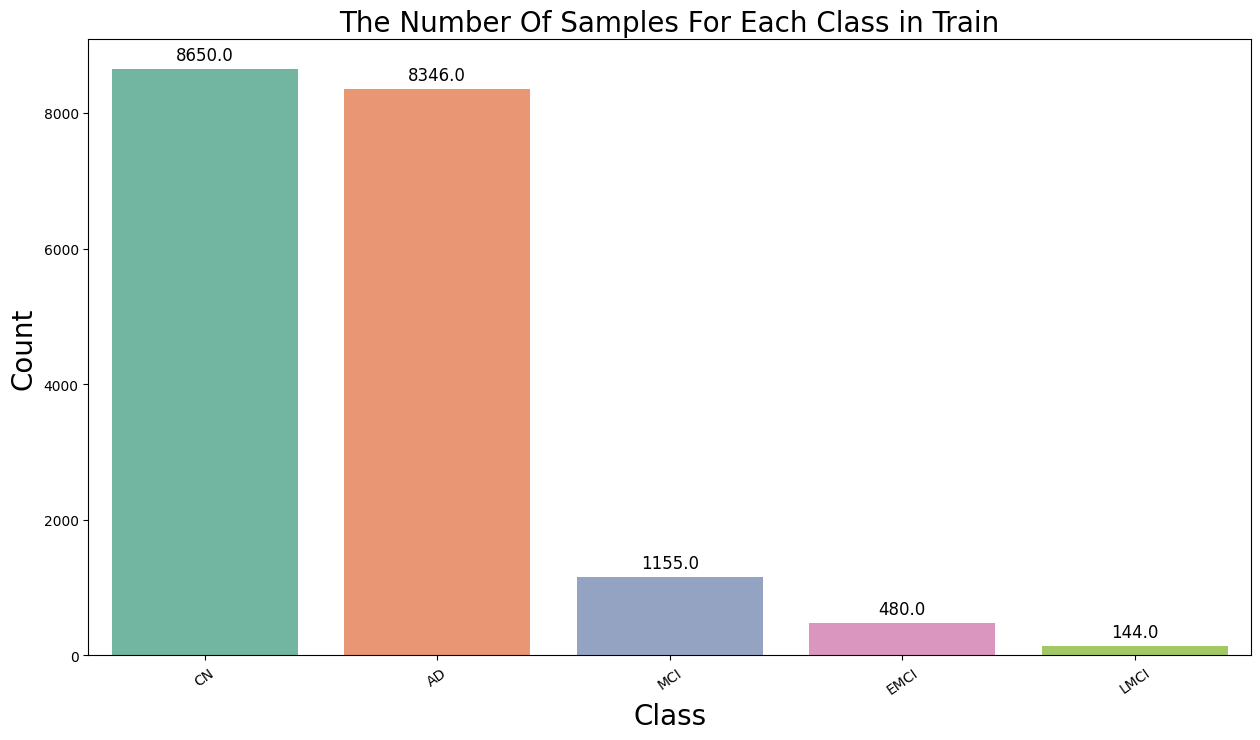

In [90]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=all_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in Train', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

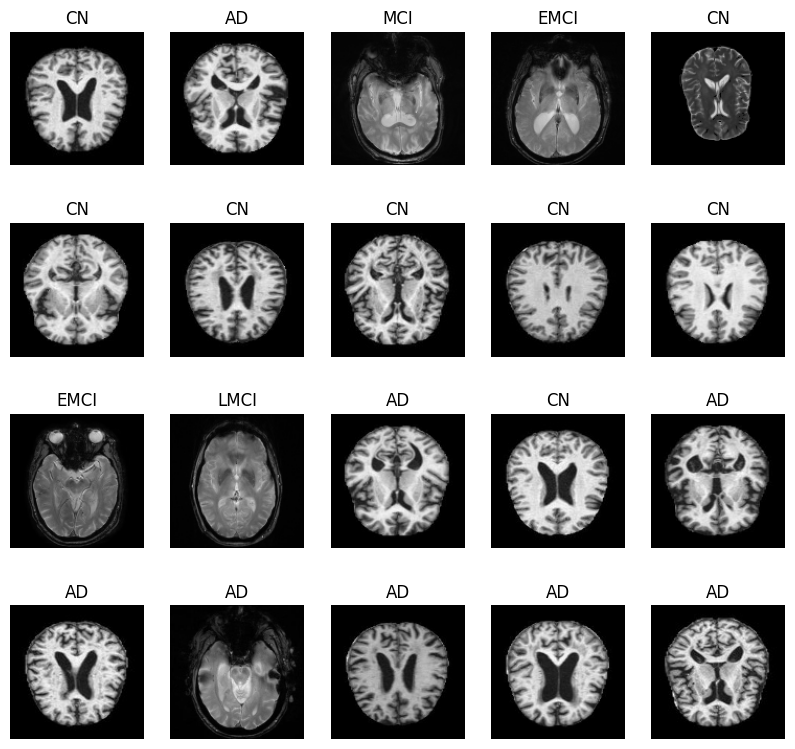

In [91]:
plt.figure(figsize=(10,12))

for n,i in enumerate(np.random.randint(0,len(all_df_edited),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(all_df_edited.image[i])
    img=cv2.resize(img,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(all_df_edited.label[i],fontsize=12)

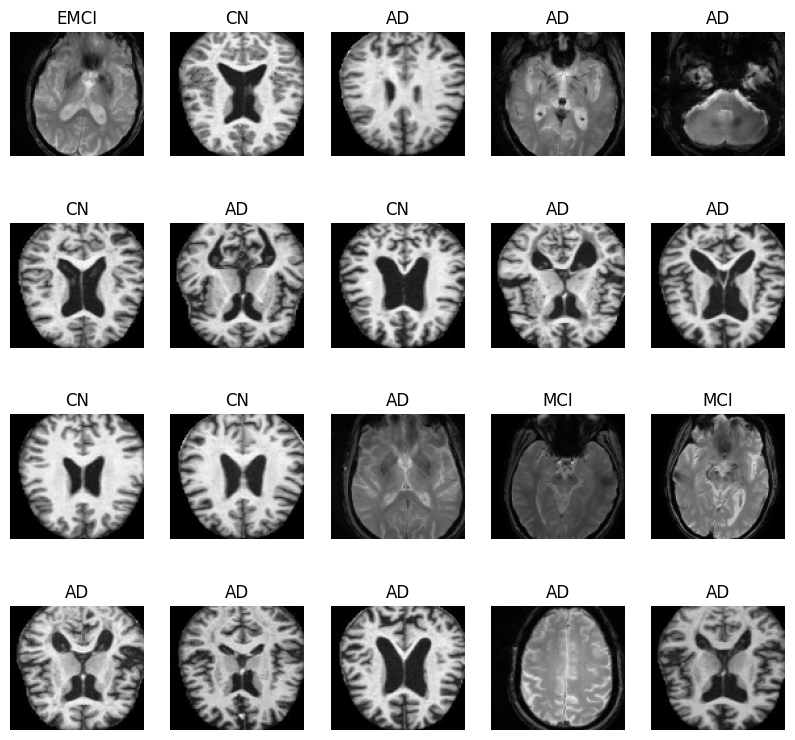

In [92]:
plt.figure(figsize=(10,12))

for n,i in enumerate(np.random.randint(0,len(all_df_edited),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(all_df_edited.image[i])
    img=cv2.resize(img,(128,128))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    cropped_image = img[20:115, 8:110]
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.title(all_df_edited.label[i],fontsize=12)

In [93]:
temp_df_edited, test_df_edited = train_test_split(all_df_edited, test_size=0.15, stratify=all_df_edited['label'], random_state=43)
train_df_edited, val_df_edited = train_test_split(temp_df_edited, test_size=0.15, stratify=temp_df_edited['label'], random_state=43)


train_df_edited = train_df_edited.reset_index(drop=True)
val_df_edited = val_df_edited.reset_index(drop=True)
test_df_edited = test_df_edited.reset_index(drop=True)
train_df_edited.shape, test_df_edited.shape, val_df_edited.shape

((13564, 2), (2817, 2), (2394, 2))

/tmp/ipykernel_41307/1169724873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=test_df_edited.label, palette='Set2')


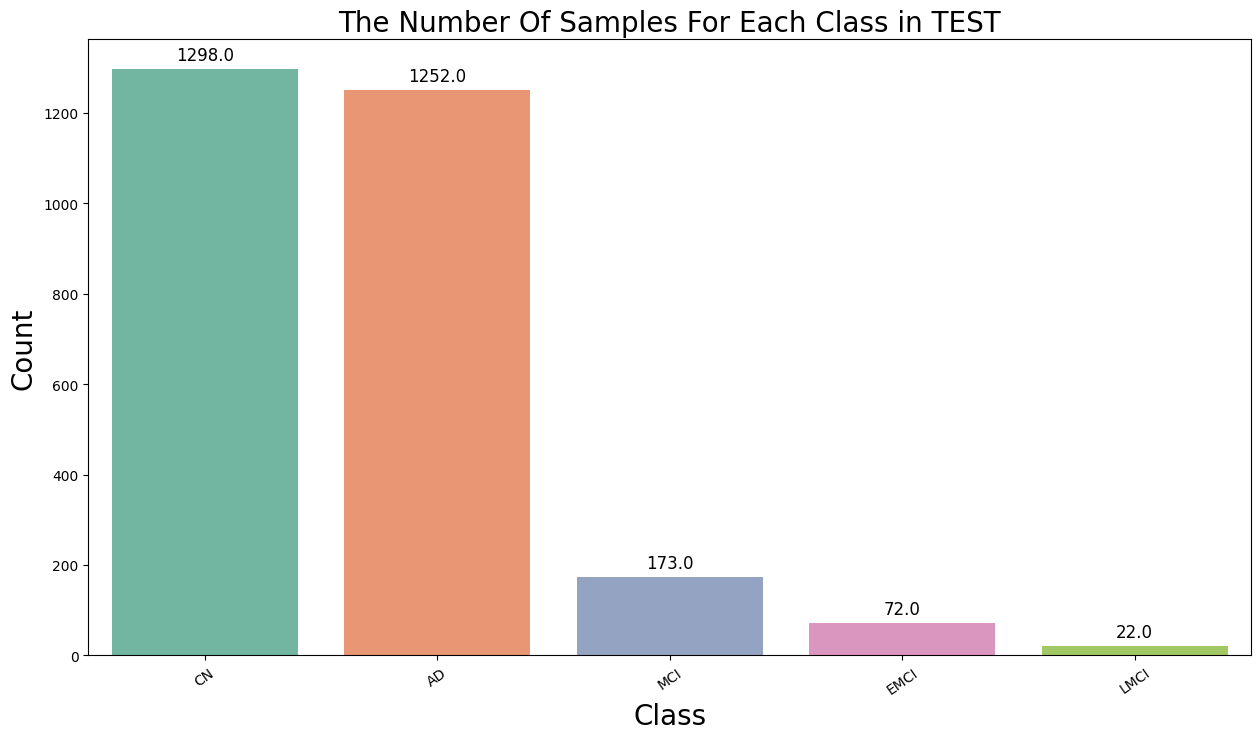

In [94]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=test_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

/tmp/ipykernel_41307/3995720465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train_df_edited.label, palette='Set2')


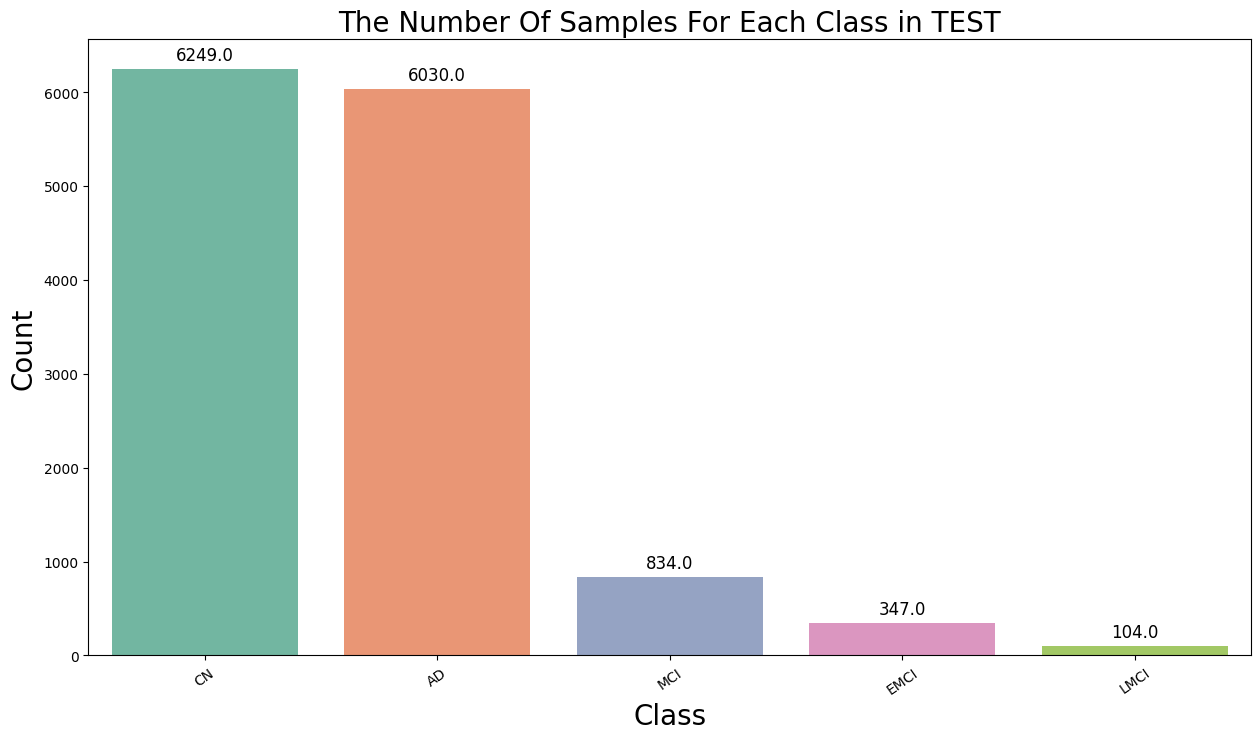

In [95]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=train_df_edited.label, palette='Set2')
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class in TEST', fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

In [98]:
# image = cv2.imread('/home/user/Desktop/personal/linkon/Alzheimer/ADNI/new/axial_masked_edited/AD/I31143_100.jpg')
        
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
# plt.imshow(image_rgb)

In [99]:
def load_resize_normalize_data(df, target_size=(128, 128)):
    images = []
    labels = []
    
    label_encoder = LabelEncoder()
    for index, row in df.iterrows():
   
        image_path = row['image']
        image = cv2.imread(image_path)
        

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# Convert to RGB format
        # image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
        resized_image = cv2.resize(image_rgb, (128,128))
        # resized_image = resized_image[20:115, 8:110]
#         resized_image = resized_image[15:115,18:120]
        # resized_image =cv2.resize(resized_image, None, fx=2.2,fy=1.5)
        

        normalized_image = resized_image / 255.0 
        
        # Store the resized and normalized image and its corresponding label
        images.append(normalized_image)
        labels.append(row['label'])
  
    encoded_labels_lb = label_encoder.fit_transform(labels)
    
    class_mapping ={  'AD':0,'CN':1, 'EMCI': 2, 'LMCI': 3, 'MCI':4}
    
    y_mapped =df['label'].map(class_mapping)
    y_one_hot = to_categorical(y_mapped, num_classes=5)
    return np.array(images), np.array(encoded_labels_lb), label_encoder.classes_, y_one_hot




In [100]:
train_images, train_encoded_labels, classes, train_one_hot = load_resize_normalize_data(train_df_edited)



In [101]:
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, 
     horizontal_flip=True)

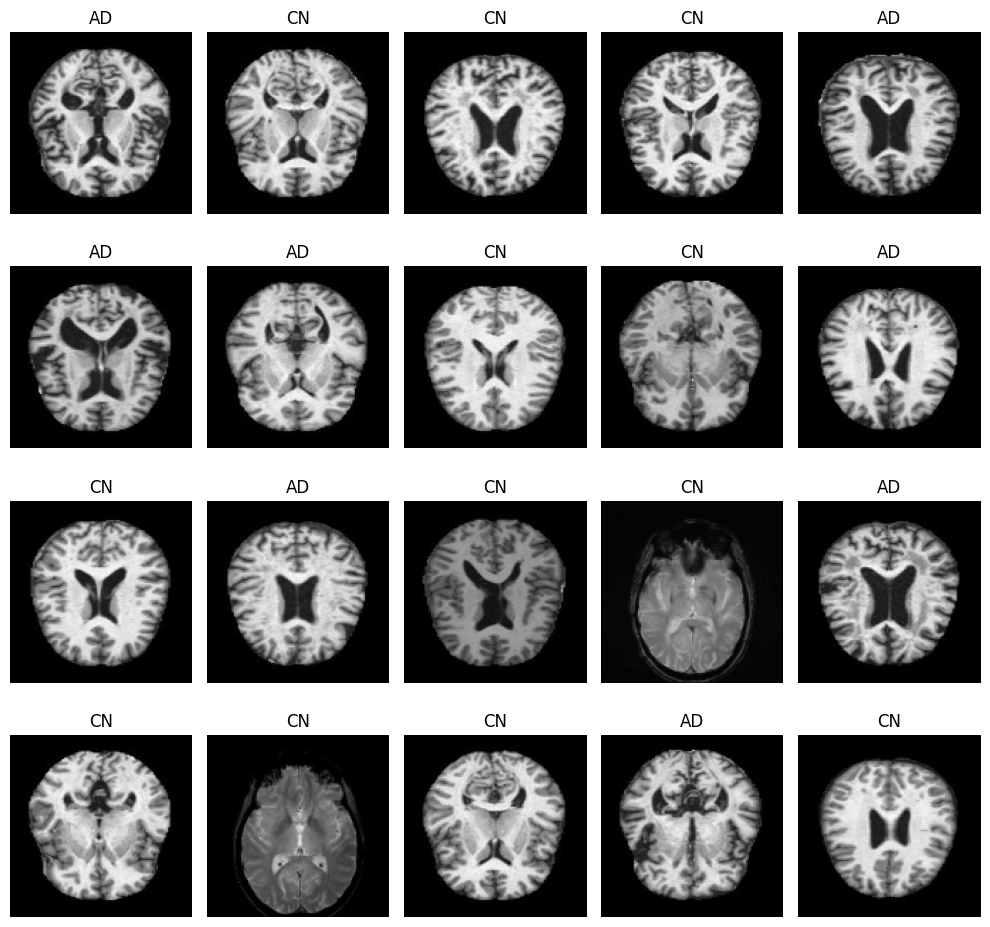

In [102]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(train_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = train_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[train_encoded_labels[i]], fontsize=12)

plt.tight_layout()

In [103]:
train_gen = train_datagen.flow(train_images, train_one_hot, batch_size=8, shuffle=True)

# Val Processing

In [104]:
val_images, val_encoded_labels, val_classes, val_one_hot = load_resize_normalize_data(val_df_edited)



In [105]:
print("Shape of images array:", val_images.shape)
print("Shape of encoded labels array:", val_encoded_labels.shape)
print("Classes:", val_classes)
# print("One HOt clases:", val_one_hot)
print("One HOt clases:", val_one_hot.shape)

Shape of images array: (2394, 128, 128, 3)
Shape of encoded labels array: (2394,)
Classes: ['AD' 'CN' 'EMCI' 'LMCI' 'MCI']
One HOt clases: (2394, 5)


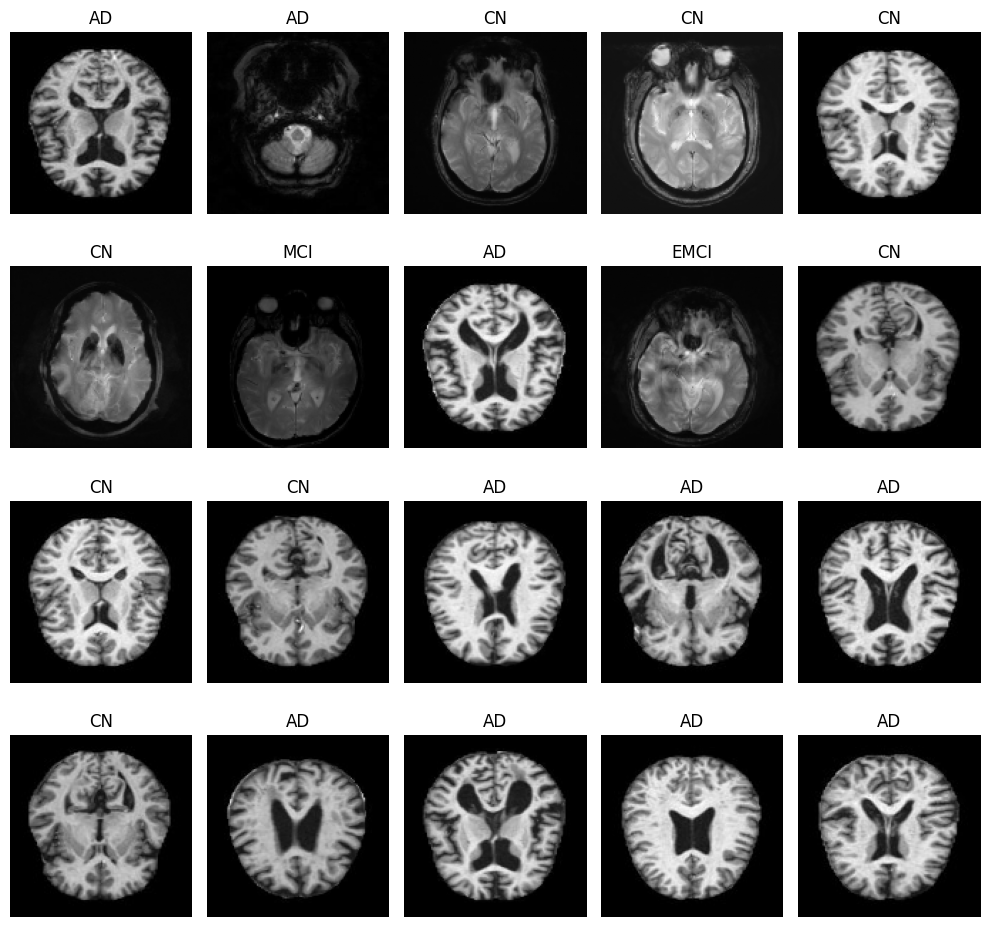

In [106]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(val_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = val_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[val_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Test preprocessing

In [107]:
test_images, test_encoded_labels, test_classes, test_one_hot = load_resize_normalize_data(test_df_edited)



In [108]:
print("Shape of images array:", test_images.shape)
print("Shape of encoded labels array:", test_encoded_labels.shape)
print("Classes:", test_classes)
# print("One HOt clases:", test_one_hot)
print("One HOt clases:", test_one_hot.shape)

Shape of images array: (2817, 128, 128, 3)
Shape of encoded labels array: (2817,)
Classes: ['AD' 'CN' 'EMCI' 'LMCI' 'MCI']
One HOt clases: (2817, 5)


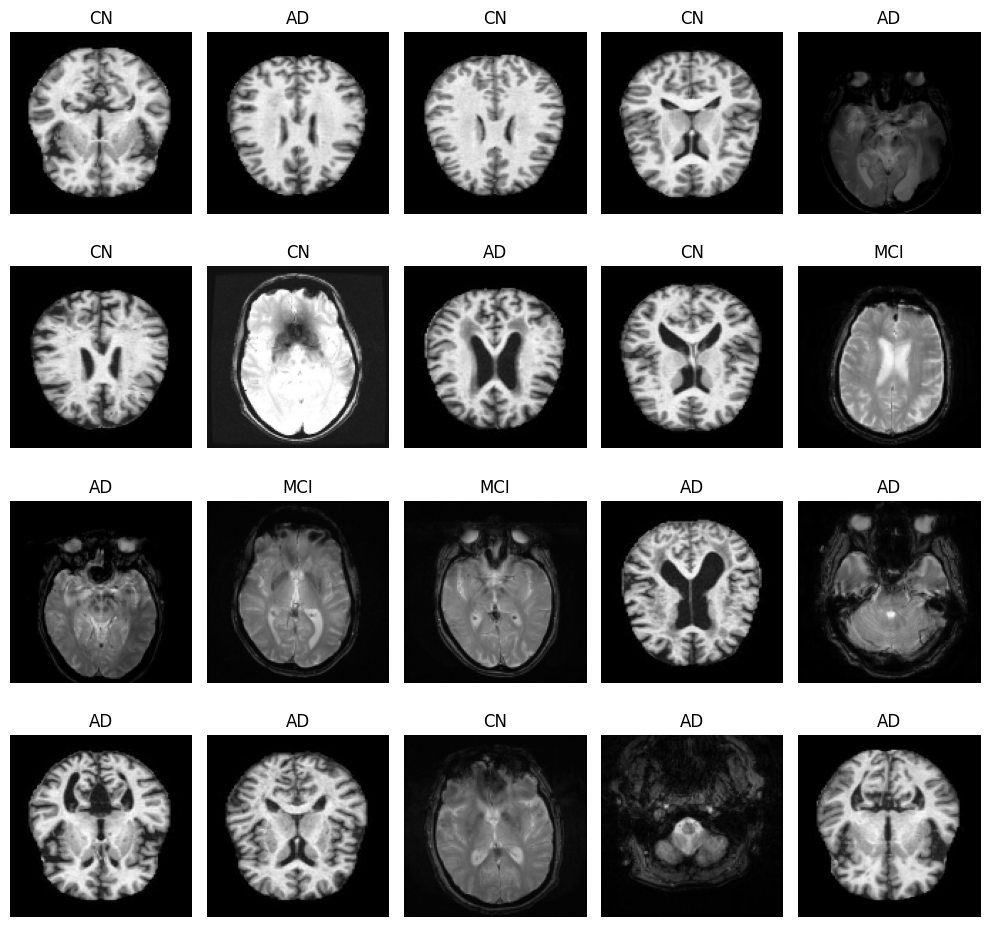

In [110]:
label_decoder = {0:'AD', 1: 'CN', 2: 'EMCI', 3: 'LMCI', 4: 'MCI'}

plt.figure(figsize=(10, 12))

for n, i in enumerate(np.random.randint(0, len(test_images), 20)):
    plt.subplot(5, 5, n + 1)
    img = test_images[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_decoder[test_encoded_labels[i]], fontsize=12)

plt.tight_layout()
plt.show()

# Data generator

In [111]:
valid_datagen = ImageDataGenerator(
    preprocessing_function=None 
)


In [112]:
batch_size=8
val_gen = valid_datagen.flow(val_images, val_one_hot, batch_size=8, shuffle=False)
test_gen = valid_datagen.flow(test_images, test_one_hot, batch_size=1, shuffle=False)

In [113]:
from keras import backend as K

IMG_CHANNELS=3
IMG_WIDTH = 128
IMG_HEIGHT = 128

if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [114]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import *
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
        initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.8,
        staircase=True)


print(lr_schedule.get_config())


{'initial_learning_rate': 0.0001, 'decay_steps': 10000, 'decay_rate': 0.8, 'staircase': True, 'name': 'ExponentialDecay'}


In [115]:
class ExpandDimsLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ExpandDimsLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

In [116]:
class Reshapelayer(Layer):
    def __init__(self, dim, **kwargs):
        super(Reshapelayer, self).__init__(**kwargs)
        self.dim = dim

    def call(self, inputs):
        return tf.reshape(inputs, [tf.shape(inputs)[0], self.dim, 1])

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dim, 1)
    
    
class ReduceMeanLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ReduceMeanLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.reduce_mean(inputs, axis=self.axis)

In [117]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [118]:
class RootMeanSquaredError(tf.keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super(RootMeanSquaredError, self).__init__(name=name, **kwargs)
        self.mse = tf.keras.metrics.MeanSquaredError()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.mse.update_state(y_true, y_pred, sample_weight)

    def result(self):
        return tf.sqrt(self.mse.result())

    def reset_states(self):
        self.mse.reset_states()

In [119]:
class SpatialAttention(tf.keras.layers.Layer):
    def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
    def build(self, input_shape):
        self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

    def call(self, inputs):
        avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
        max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

        attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

        attention = self.conv2d(attention)


        return tf.keras.layers.multiply([inputs, attention])

In [120]:
def multires_block2D(U, x, alpha=1.67, strides=1):
    kernel_initializer = 'he_normal'
    W = U * alpha
    shortcut = Conv2D(int(W*0.167) + int(W*0.333) + int(W*0.5), kernel_size=(1, 1), padding='same',
                      use_bias=False, kernel_initializer=kernel_initializer)(x)
    
    # Multi-resolution paths with Conv2D
    conv6 = Conv2D(int(W*0.167), kernel_size=(3, 3), padding='same', use_bias=False,
                   kernel_initializer=kernel_initializer)(shortcut)
    conv11 = Conv2D(int(W*0.333), kernel_size=(3, 3), padding='same', use_bias=False,
                    kernel_initializer=kernel_initializer)(conv6)
    conv17 = Conv2D(int(W*0.5), kernel_size=(3, 3), padding='same', use_bias=False,
                    kernel_initializer=kernel_initializer)(conv11)
    
    # Concatenate the multi-resolution outputs
    out = tf.keras.layers.concatenate([conv6, conv11, conv17], axis=-1)
    out = LayerNormalization(axis=-1)(out, training=True)
    
    # Add the skip connection
    out = Add()([out, shortcut])
    
    # Final Conv2D layer with strides
    out = Conv2D(int(W*0.167) + int(W*0.333) + int(W*0.5), kernel_size=(5, 5), padding='same',
                 strides=strides, use_bias=False, kernel_initializer=kernel_initializer)(out)
    out = Activation('relu')(out)
    out = LayerNormalization(axis=-1)(out, training=True)
    
    return out

In [121]:
def line1(x):
    # received shape: (64, 64, 3)
    kernel_ ='he_normal'
    conv_1 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer = kernel_)(x)

    
    block1_conv1 = Conv2D(32, (1, 1), activation='relu', padding='same', kernel_initializer = kernel_)(conv_1)
    block1_pool = MaxPool2D(2, 2)(block1_conv1)

    block2_conv1 = Conv2D(64, (7, 7), activation='relu', padding='same', kernel_initializer = kernel_)(block1_pool)
    block2_pool = MaxPool2D(2, 2)(block2_conv1)
  
    return block2_pool

def line2(x):
    # received shape: (32, 32, 3)


    conv_1 = Conv2D(16, (7, 7), activation='relu', padding='same')(x)
    conv_1 = BatchNormalization()(conv_1, training=True)
    conv_1 = Dropout(0.3)(conv_1)


    block1_conv1 = Conv2D(64, (5, 5), activation='relu', padding='same')(conv_1)
    block1_conv1 = BatchNormalization()(block1_conv1, training=True)
    block1_conv1 = MaxPool2D(2, 2)(block1_conv1)


    return block1_conv1

def line3(x):
    # received shape: (16, 16, 3)


    conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    conv_1 = LayerNormalization()(conv_1)

    block1_conv1 = Conv2D(16, (2, 2), activation='relu', padding='same')(conv_1)
    block1_conv1 = LayerNormalization()(block1_conv1)

    block2_conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(block1_conv1)
    block2_pool = AvgPool2D(2, 2)(block2_conv1)

    return block2_pool



def line4(x):
    conv_1 = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
    conv_1 = Conv2D(64, (14, 14), activation='relu', padding='same')(conv_1)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_1 = BatchNormalization()(conv_1, training=True)
#     reshaped = Reshape((conv_1.shape[1] * conv_1.shape[2], conv_1.shape[3]))(conv_1)
#     lstm_1 = LSTM(32, return_sequences=True)(reshaped)
#     query_attn = GroupQueryAttention(head_dim=128,num_query_heads=8,num_key_value_heads=4)
#     attention= query_attn(query =conv_1, value= conv_1)

    return conv_1

def line5(x):
    conv_1 = Conv2D(128, (5,5), activation='relu', padding='same')(x)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = BatchNormalization()(conv_1)
    
    
    multires_block_1 = multires_block2D(U=32, x= conv_1)
    multires_block_1 = BatchNormalization()(multires_block_1)
    multires_block_1 = multires_block2D(U=64, x= multires_block_1)

    
    reshaped = Reshape((multires_block_1.shape[1] * multires_block_1.shape[2], multires_block_1.shape[3]))(multires_block_1)

    
  
    lstm1 = Bidirectional(LSTM(32, return_sequences=True))(reshaped)
#     out = Dense(128, activation='relu')(lstm1)
    return lstm1

In [122]:
def get_model(num_classes):
    
    signal = Input(shape=(128, 128, 3), dtype=np.float32, name='signal')
    


    # converting to (32, 32, 3):
    conv_1 = Conv2D(64, (5,5), activation='relu', padding='same', strides=1)(signal)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)  # (32, 32, 3)
    f1_conv= line1(conv_1)


    # converting to (16, 16, 3):
    conv_1 = Conv2D(256, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(pool_size=(2,2))(conv_1)  # (16, 16, 3)
    conv_1 = Conv2D(128, (9,9), activation='relu', padding='same', strides=1)(conv_1)
    f2_conv = line2(conv_1)
    spat_atten = SpatialAttention(8)
    f2_conv = spat_atten(f2_conv)
    
    concat_1 = keras.layers.concatenate([f1_conv, f2_conv], axis=-1)

    # converting to (8, 8, 3):
    

    conv_1 = Conv2D(128, (5, 5), activation='relu', padding='same', strides=1)(conv_1)
    conv_1 = MaxPool2D(2)(conv_1)  
    f3_conv= line3(conv_1)
    print(f3_conv.shape)
#     f3_conv_reshaped = Reshape((f3_conv.shape[1] * f3_conv.shape[2], f3_conv.shape[3]))(f3_conv)

    
    
    # converting to (8, 8, 3): # same input line4 function
    f4_conv= line4(conv_1)
    concat_2 = keras.layers.concatenate([f3_conv, f4_conv], axis=-1)
    
    concat_1 = Dropout(0.3)(concat_1)
    print(concat_1.shape, concat_2.shape)
    xm = MultiHeadAttention(num_heads=8, key_dim=32*8)(concat_1, concat_2)
    print(xm.shape)
    
    
    f_lstm = line5(conv_1)
    f5 = line5(xm)
#     concat_3 = Concatenate(axis=1)([f_lstm, f5])
    query_attn = GroupQueryAttention(head_dim=128,num_query_heads=8,num_key_value_heads=4)
    xm= query_attn(query =f5, value= f_lstm)

#     xm = MultiHeadAttention(num_heads=8, key_dim=32*8)(f5, f_lstm)
    block1_conv1 = Conv2D(64, (7, 7), activation='leaky_relu', padding='same')(ExpandDimsLayer(axis=-1)(xm))
    block1_conv1 = MaxPooling2D(pool_size=(3,3))(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    block1_conv1 = Conv2D(32, (3,3), activation='leaky_relu', padding='same')(block1_conv1)
    block1_conv1 = MaxPooling2D(pool_size=(2,2))(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    block1_conv1 = Conv2D(16, (5,5), activation='leaky_relu', padding='same')(block1_conv1)
    block1_conv1 = LayerNormalization()(block1_conv1)
    #concat = ReduceMeanLayer(axis=2)(concat)# old code
    avg_pool = GlobalAveragePooling2D()(block1_conv1)
#=====================================================================================
    dense_1 = Dense(128, activation='relu')(avg_pool)
    dense_1 = Dense(32, activation='relu')(dense_1)
    out = Dense(num_classes, activation='softmax')(dense_1)

    model = Model(inputs=signal, outputs=[out])
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),  metrics=[tf.keras.metrics.CategoricalAccuracy(
                    name='accuracy'),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                    tf.keras.metrics.AUC(num_thresholds=200,curve="ROC",summation_method="interpolation",name="AUC",dtype=None,thresholds=None,
                    multi_label=True,label_weights=None,),
                    tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(),
                    F1Score(name='f1_score'),
                    tf.keras.metrics.MeanAbsoluteError(name='MAE'),
                    tf.keras.metrics.MeanAbsolutePercentageError(name='MAPE'),
                    RootMeanSquaredError(name='RMSE')]) 
    
    return model

if __name__ == "__main__":
    model = get_model(5)
    model.summary()

(None, 8, 8, 64)
(None, 16, 16, 128) (None, 8, 8, 128)
(None, 16, 16, 128)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ signal (InputLayer) │ (None, 128, 128,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │      4,864 │ signal[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_40[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 64, 64,    │    409,856 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 32, 32,    │          0 │ conv2d_44[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 32, 32,    │  2,654,336 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 32, 32,    │    100,368 │ conv2d_45[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 32, 32,    │    409,728 │ conv2d_45[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_46[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 16, 16,    │          0 │ conv2d_49[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 16, 16, 8) │      9,224 │ max_pooling2d_14… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 64, 64,    │      4,128 │ conv2d_41[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 32, 32,    │     25,664 │ dropout_6[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 16, 16, 8) │         16 │ conv2d_50[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_42[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                 

 Total params: 7,293,481 (27.82 MB)

 Trainable params: 7,292,477 (27.82 MB)

 Non-trainable params: 1,004 (3.92 KB)

In [123]:
# tf.keras.utils.plot_model(model, to_file='./Proposed_Model.png')


In [124]:

from tensorflow.keras.callbacks import Callback 
class LearningRateSchedulerWithPatienceIoU(Callback):
    def __init__(self, reduce_lr_factor, patience, min_lr, monitor='val_iou'):
        super(LearningRateSchedulerWithPatienceIoU, self).__init__()
        self.reduce_lr_factor = reduce_lr_factor
        self.patience = patience
        self.min_lr = min_lr
        self.monitor = monitor
        self.wait = 0
        self.best_iou = -float('inf')
#         self.model = model
        
    def on_epoch_end(self, epoch, logs=None):
        current_iou = logs.get(self.monitor, -float('inf'))
        
        if current_iou > self.best_iou:
            self.best_iou = current_iou
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = self.model.optimizer.learning_rate.numpy() * self.reduce_lr_factor
                print(new_lr)
                new_lr = max(new_lr, self.min_lr)
                
                self.model.optimizer.learning_rate.assign(new_lr)
                print(f"\nReduced learning rate to {new_lr} after {self.patience} epochs without improvement in IoU.\n")
                self.wait = 0





In [125]:
# initial_learning_rate = 0.00075  # Initial learning rate
# reduce_lr_factor = 0.5  # Factor by which to reduce the learning rate
# patience = 1  # Number of epochs without improvement in IoU before reducing learning rate
# min_learning_rate = 1e-6  # Minimum learning rate

# # Create the custom learning rate scheduler
# lr_scheduler = LearningRateSchedulerWithPatienceIoU(reduce_lr_factor, patience, min_learning_rate)

In [126]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_plateu = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

In [127]:
train_one_hot.shape

(13564, 5)

In [128]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-3-class-not-balanced-16_oct-axial_multoresnet.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [129]:
# model.load_weights(checkpoint_path)

In [130]:

history = model.fit(train_gen,epochs=50, validation_data=val_gen,  callbacks=[checkpoint, lr_plateu],verbose=1)


Epoch 1/50


/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-16 20:08:21.018344: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/dropout_9_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 970/1696 ━━━━━━━━━━━━━━━━━━━━ 1:17 107ms/step - AUC: 0.6093 - MAE: 0.2593 - MAPE: 129644104.0000 - Precision: 0.3804 - RMSE: 0.3517 - Recall: 0.0615 - accuracy: 0.4454 - f1_score: 0.1014 - false_negatives_1: 3527.2937 - false_positives_1: 349.2814 - loss: 1.1120

W0000 00:00:1729087806.492261   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.493450   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.494710   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.495879   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.497166   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.498326   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.499644   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.500927   42505 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087806.502388   42505 gp

 972/1696 ━━━━━━━━━━━━━━━━━━━━ 1:20 111ms/step - AUC: 0.6094 - MAE: 0.2593 - MAPE: 129626272.0000 - Precision: 0.3806 - RMSE: 0.3517 - Recall: 0.0616 - accuracy: 0.4455 - f1_score: 0.1016 - false_negatives_1: 3533.7439 - false_positives_1: 350.8878 - loss: 1.1118

W0000 00:00:1729087810.329265   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.332132   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.333705   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.334939   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.336177   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.337514   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.338929   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.340461   42507 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087810.341808   42507 gp

1696/1696 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - AUC: 0.6510 - MAE: 0.2502 - MAPE: 125079048.0000 - Precision: 0.4311 - RMSE: 0.3469 - Recall: 0.1144 - accuracy: 0.4485 - f1_score: 0.1733 - false_negatives_1: 5721.8042 - false_positives_1: 1063.5767 - loss: 1.0526

W0000 00:00:1729087898.964417   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.965510   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.966556   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.967647   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.968736   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.969931   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.970953   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.972226   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087898.973382   42494 gp


Epoch 1: val_accuracy improved from -inf to 0.44069, saving model to /home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-3-class-not-balanced-16_oct-axial_multoresnet.keras


W0000 00:00:1729087899.971282   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.972327   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.973407   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.974426   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.975489   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.976554   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.977607   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.978694   42494 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1729087899.979726   42494 gp

1696/1696 ━━━━━━━━━━━━━━━━━━━━ 208s 117ms/step - AUC: 0.6510 - MAE: 0.2501 - MAPE: 125074600.0000 - Precision: 0.4311 - RMSE: 0.3469 - Recall: 0.1145 - accuracy: 0.4485 - f1_score: 0.1734 - false_negatives_1: 5724.6846 - false_positives_1: 1064.7036 - loss: 1.0525 - val_AUC: 0.7669 - val_MAE: 0.2248 - val_MAPE: 112379144.0000 - val_Precision: 0.4962 - val_RMSE: 0.3349 - val_Recall: 0.3509 - val_accuracy: 0.4407 - val_f1_score: 0.4111 - val_false_negatives_1: 1554.0000 - val_false_positives_1: 853.0000 - val_loss: 0.8858 - learning_rate: 1.0000e-04
Epoch 2/50
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - AUC: 0.7620 - MAE: 0.2240 - MAPE: 112016432.0000 - Precision: 0.5012 - RMSE: 0.3348 - Recall: 0.3392 - accuracy: 0.4555 - f1_score: 0.4043 - false_negatives_1: 4460.7446 - false_positives_1: 2319.3650 - loss: 0.8849
Epoch 2: val_accuracy improved from 0.44069 to 0.44444, saving model to /home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-3-class-not-balanced-16_oct-axial_mul

In [131]:
import pandas as pd

history_df = pd.DataFrame()


for col in history.history.keys():
    history_df[col] = history.history[col]

history_df.head()
history_df.to_csv('./Proposed_model_5_class_adni_not_balanced-multiresnet-model_16_oct.csv', index=False)

In [132]:
model.load_weights(checkpoint_path)

In [67]:
# print(model.evaluate(atrain_images, all_train_one_hot))

In [133]:
print(model.evaluate(val_gen))

300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 0.9613 - MAE: 0.0581 - MAPE: 29066696.0000 - Precision: 0.9551 - RMSE: 0.1671 - Recall: 0.8379 - accuracy: 0.9019 - f1_score: 0.8926 - false_negatives_1: 196.6944 - false_positives_1: 50.7708 - loss: 0.2635
[0.2600412666797638, 0.8943191170692444, 0.8366750478744507, 0.9538094997406006, 0.9712937474250793, 97.0, 391.0, 0.8914107084274292, 0.05829503759741783, 29147526.0, 0.1674679070711136]


In [134]:
# print(model.evaluate(test_images, test_one_hot))

In [135]:
print(model.evaluate(test_gen))

   9/2817 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - AUC: 0.4222 - MAE: 0.0303 - MAPE: 15134436.0000 - Precision: 1.0000 - RMSE: 0.0795 - Recall: 0.9317 - accuracy: 0.9317 - f1_score: 0.9617 - false_negatives_1: 0.5556 - false_positives_1: 0.0000e+00 - loss: 0.1297                 

/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2817/2817 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - AUC: 0.9603 - MAE: 0.0598 - MAPE: 29907898.0000 - Precision: 0.9516 - RMSE: 0.1699 - Recall: 0.8403 - accuracy: 0.8883 - f1_score: 0.8924 - false_negatives_1: 233.5153 - false_positives_1: 62.3141 - loss: 0.2690
[0.2693871855735779, 0.8881788849830627, 0.8335108160972595, 0.9502226114273071, 0.9671751260757446, 123.0, 469.0, 0.8880483508110046, 0.05990694463253021, 29953464.0, 0.17034021019935608]


In [136]:
# from tensorflow.keras.models import load_model
# model.save('/home/user/Desktop/personal/linkon/Alzheimer/Code/Weights/adni-3-class-not-balanced-25-sep.keras')

dict_keys(['AUC', 'MAE', 'MAPE', 'Precision', 'RMSE', 'Recall', 'accuracy', 'f1_score', 'false_negatives_1', 'false_positives_1', 'loss', 'val_AUC', 'val_MAE', 'val_MAPE', 'val_Precision', 'val_RMSE', 'val_Recall', 'val_accuracy', 'val_f1_score', 'val_false_negatives_1', 'val_false_positives_1', 'val_loss', 'learning_rate'])


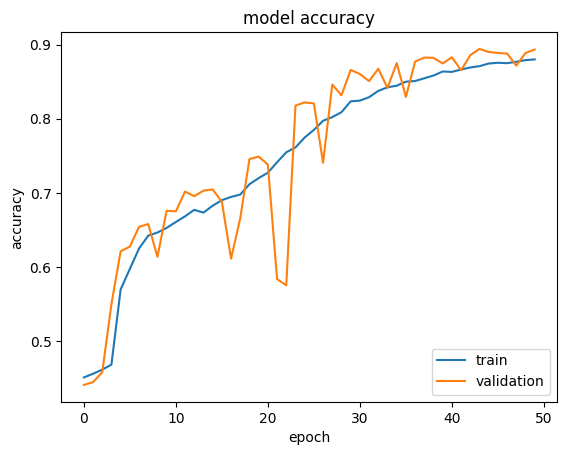

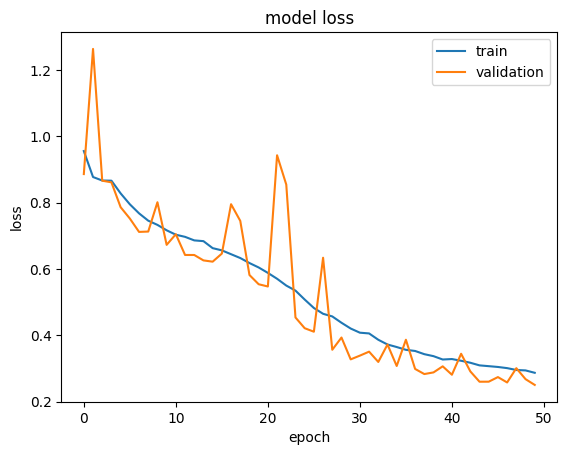

In [137]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [138]:
Y_prob = model.predict(test_images)
print(Y_prob)

89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step
[[6.8720075e-04 9.9930453e-01 7.3435990e-06 4.3092104e-08 7.8138476e-07]
 [8.9467388e-01 9.3698660e-03 3.1818056e-03 5.1111594e-04 9.2263423e-02]
 [9.9378306e-01 5.9862463e-03 1.0612833e-05 1.9992591e-07 2.2000147e-04]
 ...
 [9.8651475e-01 1.2999151e-02 3.3050466e-05 8.8404533e-07 4.5212969e-04]
 [1.2103606e-01 3.9840797e-01 2.1298283e-01 7.2500408e-02 1.9507277e-01]
 [9.9816787e-01 1.3113901e-03 7.0037213e-06 1.5608728e-07 5.1352376e-04]]


In [139]:
y_pred = np.argmax(Y_prob, axis=1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [140]:
np.argmax(test_one_hot, axis=1)

array([1, 0, 0, ..., 0, 4, 0])

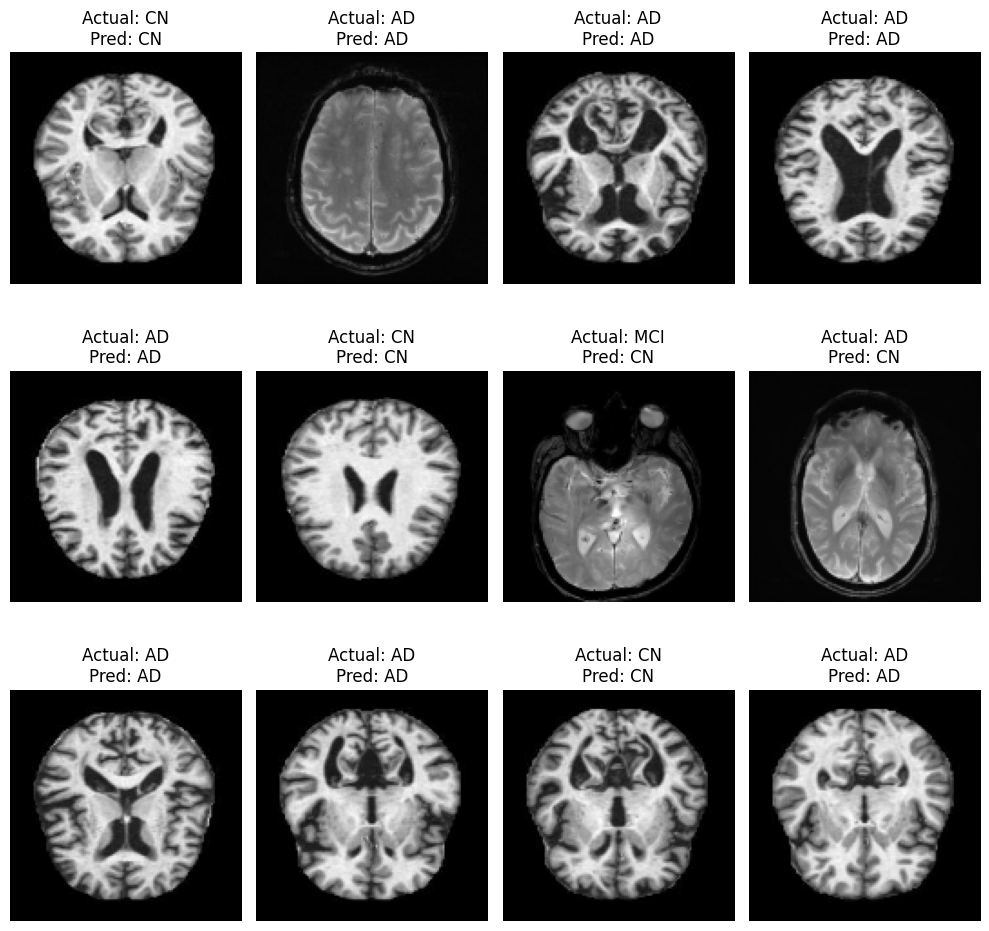

In [141]:
true_labels = test_encoded_labels#np.argmax(test_one_hot, axis=1)


num_images = min(12, len(test_images))  # Ensure we don't exceed the number of images available
columns = 4
rows = (num_images + columns - 1) // columns  
fig = plt.figure(figsize=(10, 10))
label_names = classes  

for i in range(1, num_images + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i - 1])
#     actual_label = label_names[true_labels[i - 1]]
    actual_label = label_names[test_encoded_labels[i - 1]]
    predicted_label = label_names[y_pred[i - 1]]
    plt.title(f'Actual: {actual_label}\nPred: {predicted_label}')
    plt.axis('off')  

plt.tight_layout()
plt.show()

In [142]:
from sklearn.metrics import classification_report


# Compute accuracy score
report = classification_report(test_encoded_labels, y_pred, target_names=classes)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          AD       0.95      0.91      0.93      1252
          CN       0.87      0.98      0.92      1298
        EMCI       0.35      0.08      0.13        72
        LMCI       0.00      0.00      0.00        22
         MCI       0.56      0.48      0.52       173

    accuracy                           0.89      2817
   macro avg       0.55      0.49      0.50      2817
weighted avg       0.87      0.89      0.88      2817



/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/anaconda3/envs/ecg-3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [143]:
def calculate_metrics(pred_classes, gt_classes):
    


    accuracy = np.mean(pred_classes == gt_classes)

   
    confusion_matrix = np.zeros((5, 5), dtype=int)
    np.add.at(confusion_matrix, (gt_classes, pred_classes), 1)

    sensitivity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    true_negatives = np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix))
    specificity = true_negatives / (np.sum(confusion_matrix) - np.sum(np.diag(confusion_matrix)))

    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    }
    
    return metrics

In [144]:
print(calculate_metrics(y_pred, test_encoded_labels))

{'accuracy': 0.8881789137380192, 'sensitivity': array([0.90974441, 0.98151002, 0.08333333, 0.        , 0.47976879]), 'specificity': 1.0}


In [145]:
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Reds', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = classes, 
        yticklabels = classes)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
    


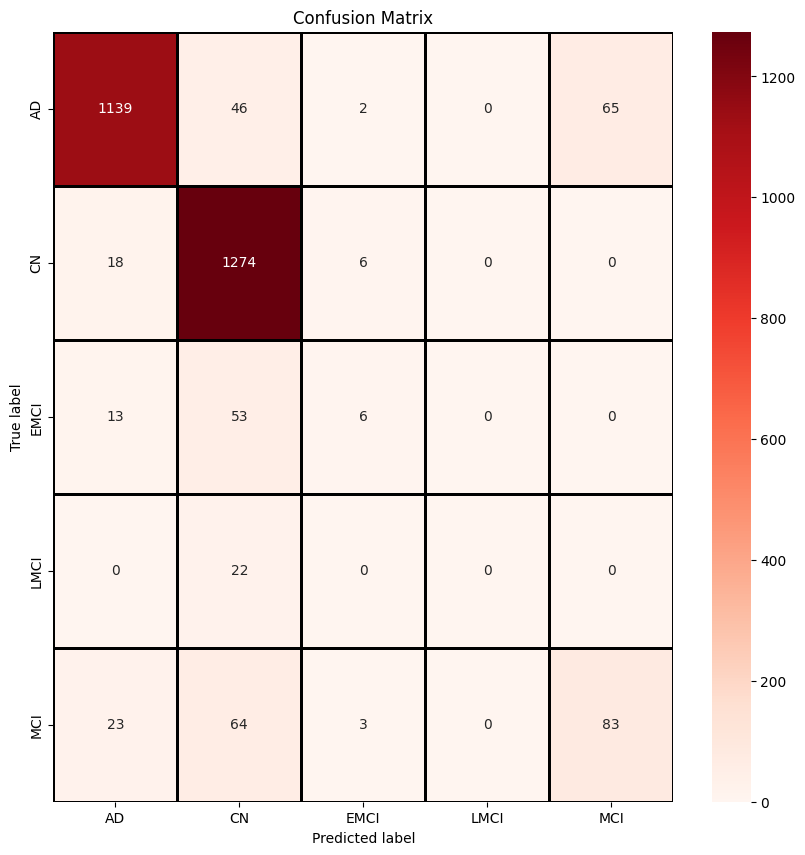

In [146]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(test_encoded_labels, y_pred))

In [147]:
def plot_confusion_matrix_perc(cm, classes):
    # Convert confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        cm_percentage, 
        cmap='Reds', 
        linecolor='black', 
        linewidth=1, 
        annot=True, 
        fmt='.2f',  # format the annotations to 2 decimal places
        xticklabels=classes, 
        yticklabels=classes
    )
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix (Percentage)')
    plt.show()

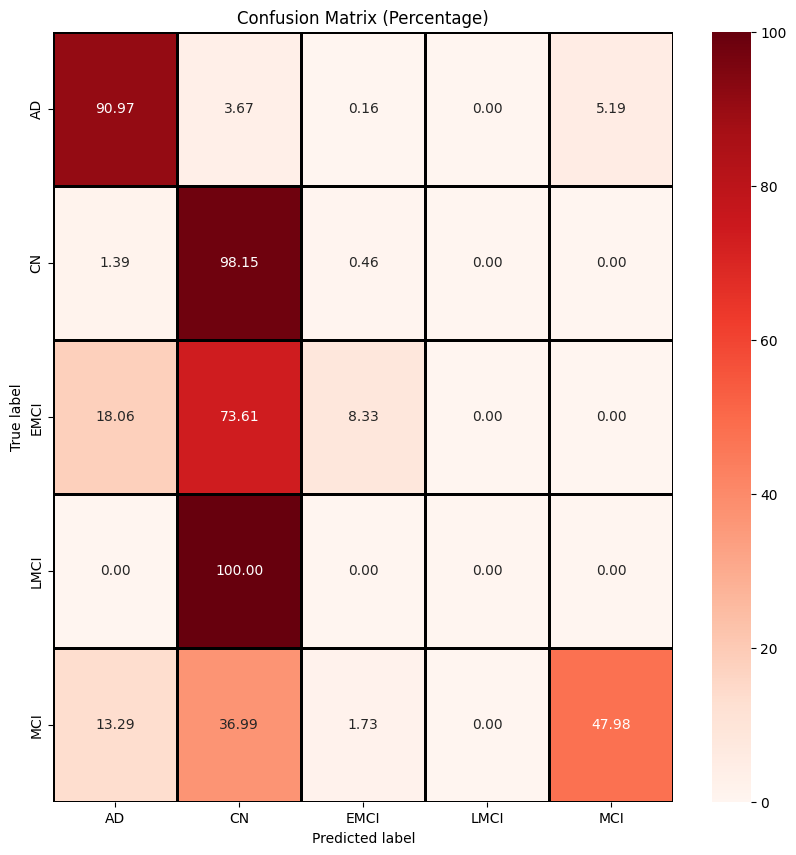

In [148]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix_perc(confusion_matrix(test_encoded_labels, y_pred), classes)